# Read SainGeo output

by Niccolo' Tubini and Riccardo Rigon under the CC4 license
___

This notebook is to plot the outputs of de Saint-Venant 1D OMS component.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os
import io

In [8]:
params = {'legend.fontsize': 'x-large', # ‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'lines.linestyle':'-',
          'lines.linewidth': 0.8,
          'lines.marker': 'None',
          'lines.markeredgewidth': 1.0,
          'lines.markersize': 16.0,
          'grid.alpha': 0.6,
          'grid.color': '#b0b0b0',
          'grid.linestyle': '--',
          'grid.linewidth': 0.8,
         }
pylab.rcParams.update(params)

In [9]:
#pylab.rcParams.keys()

In [10]:
os.getcwd()

'C:\\Users\\Niccolo\\OMS\\OMS_Project_SaintVenant1D\\docs'

In [11]:
os.chdir("../output")
os.listdir()


['DeSaintVenant1D', 'tempDischarge1.csv', 'tempLevel1.csv']

In [12]:
roundDecimal = 2

## Import the discharge file
___

In [13]:
dfDischarge = pd.read_csv("tempDischarge1.csv",delimiter=";",comment="#",names= ['sectionID','prog','Froude',"discharge",'celerity','wet area'],index_col=False )
dfDischarge = round(dfDischarge,roundDecimal)
dfDischarge.head()

,sectionID,prog,Froude,discharge,celerity,wet area
0,2,2.86,1.35,50.0,3.49,13.33
1,9,14.46,1.14,50.0,3.12,15.31
2,15,25.05,1.29,50.0,3.42,16.76
3,22,36.18,1.76,50.0,3.82,12.46
4,28,47.59,1.49,50.0,3.53,13.71


## Import the level file
___

In [14]:
dfLevel = pd.read_csv("tempLevel1.csv",delimiter=";",comment="#",names= ['sectionID','prog','freeSurf',"sectionBottom",'sectionDx','sectionSx'],index_col=False )
dfLevel["tirante"] = dfLevel["freeSurf"]-dfLevel["sectionBottom"]
dfLevel = round(dfLevel,roundDecimal)
dfLevel.head()

,sectionID,prog,freeSurf,sectionBottom,sectionDx,sectionSx,tirante
0,2,2.86,781.56,780.64,784.80,799.88,0.92
1,9,14.46,781.42,780.50,785.90,799.63,0.93
2,15,25.05,781.38,780.42,786.11,800.09,0.96
3,22,36.18,781.04,779.93,785.79,799.57,1.11
4,28,47.59,780.53,779.80,785.79,794.29,0.73


## Plot the water depht along the channel
___
- `timeIndex` defines the time index to plot
- `sectionsNumber` defines the number of sections of the channel 

In [15]:
timeIndex = 23
timeIndex1 = 0
sectionsNumber = 77

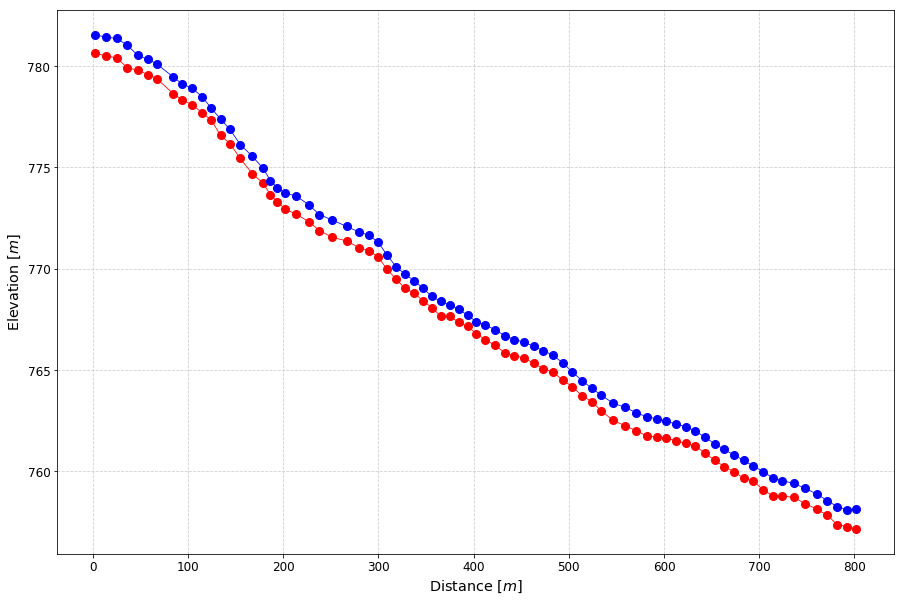

In [23]:
fig, ax = plt.subplots()
line, = plt.plot(dfLevel["prog"][0+timeIndex*sectionsNumber:sectionsNumber+timeIndex*sectionsNumber],dfLevel["sectionBottom"][0+timeIndex*sectionsNumber:sectionsNumber+timeIndex*sectionsNumber],color="red",marker='.')
line, = plt.plot(dfLevel["prog"][0+timeIndex*sectionsNumber:sectionsNumber+timeIndex*sectionsNumber],dfLevel["freeSurf"][0+timeIndex*sectionsNumber:sectionsNumber+timeIndex*sectionsNumber],color="blue",marker='.')
#line, = plt.plot(dfLevel["prog"][0+(timeIndex1)*sectionsNumber:sectionsNumber+(timeIndex1)*sectionsNumber],dfLevel["freeSurf"][0+(timeIndex1)*sectionsNumber:sectionsNumber+(timeIndex1)*sectionsNumber],color="green")

plt.grid()
plt.xlabel("Distance [$m$]")
plt.ylabel("Elevation [$m$]")

plt.show()


## Select 'level' values in a section over time
You can use the sectionID or the progressive coordinate of the section. In the first case the section ID can be retrived from the shapefile containing the sections, in the second case from the dataframe.

In [17]:
sectionID = 2
dfSectionLevel = dfLevel.loc[dfLevel['sectionID'] == sectionID]
dfSectionLevel.head()

,sectionID,prog,freeSurf,sectionBottom,sectionDx,sectionSx,tirante
0,2,2.86,781.56,780.64,784.8,799.88,0.92
77,2,2.86,781.56,780.64,784.8,799.88,0.92
154,2,2.86,781.56,780.64,784.8,799.88,0.92
231,2,2.86,781.56,780.64,784.8,799.88,0.92
308,2,2.86,781.56,780.64,784.8,799.88,0.92


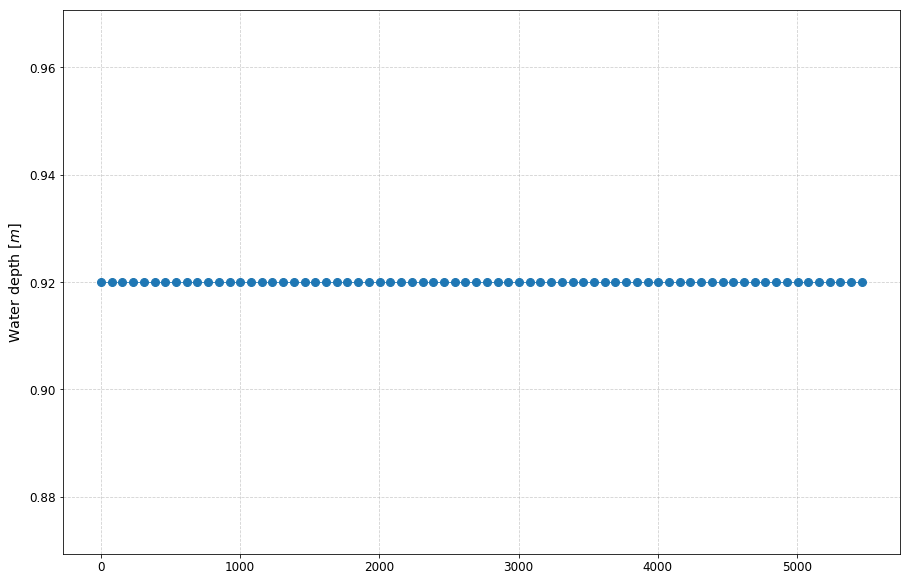

In [18]:
plt.plot(dfSectionLevel["tirante"], marker='.')
plt.grid()
#plt.xlabel("Distance [$m$]")
plt.ylabel("Water depth [$m$]")

plt.show()

On the x-axis you should read the time but now you read the index of the row in the dataframe

### Plot the water depth in two different section on the same graph

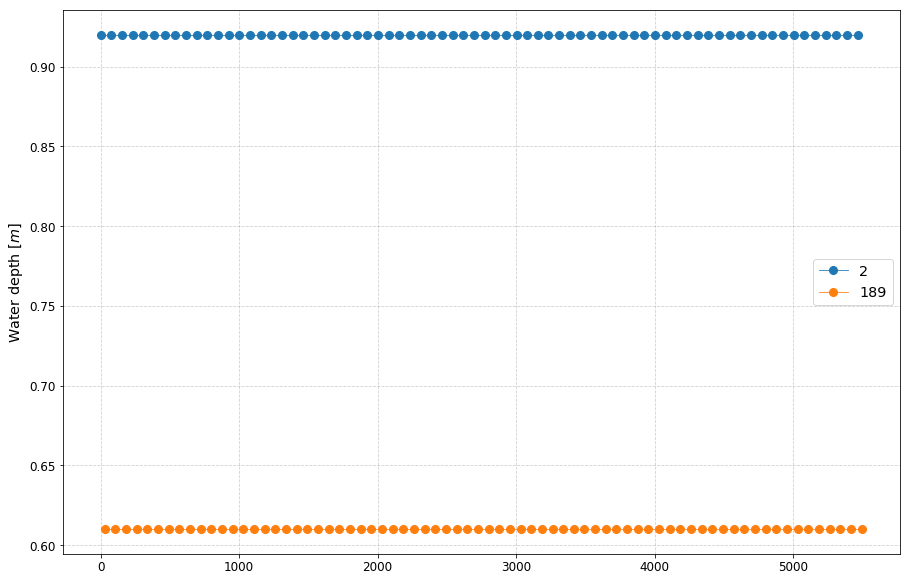

In [19]:
sectionID1 = 2
sectionID2 = 189

plt.plot(dfLevel.loc[dfLevel['sectionID'] == sectionID1]["tirante"], marker='.')
plt.plot(dfLevel.loc[dfLevel['sectionID'] == sectionID2]["tirante"], marker='.')
plt.grid()
#plt.xlabel("Distance [$m$]")
plt.ylabel("Water depth [$m$]")
plt.legend([sectionID1, sectionID2])

plt.show()

## Select 'discharge' values in a section over time
You can use the sectionID or the progressive coordinate of the section. In the first case the section ID can be retrived from the shapefile containing the sections, in the second case from the dataframe.

In [20]:
sectionID = 2
dfSectionDischarge = dfDischarge.loc[dfDischarge['sectionID'] == sectionID]
dfSectionDischarge.head()

,sectionID,prog,Froude,discharge,celerity,wet area
0,2,2.86,1.35,50.0,3.49,13.33
77,2,2.86,1.35,50.0,3.49,13.33
154,2,2.86,1.35,50.0,3.49,13.33
231,2,2.86,1.35,50.0,3.49,13.33
308,2,2.86,1.35,50.0,3.49,13.33


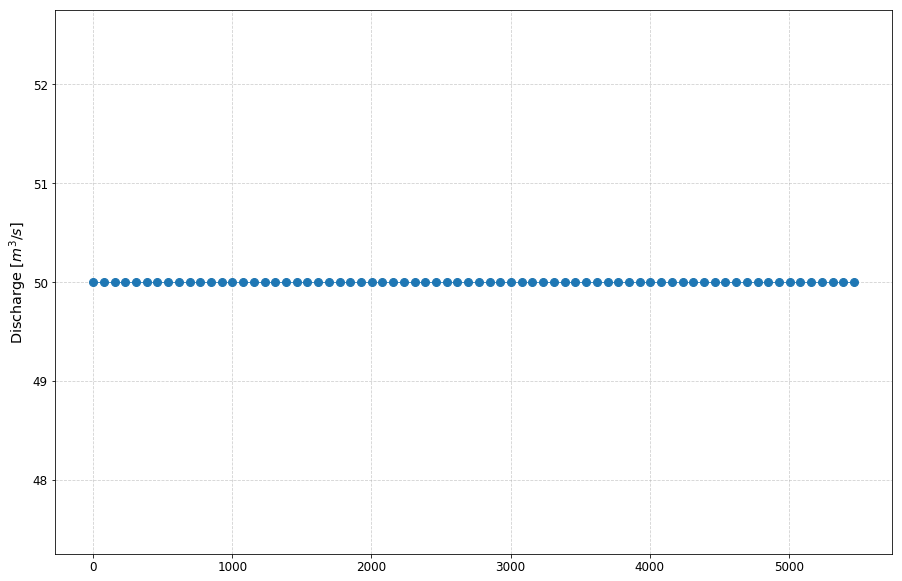

In [21]:
plt.plot(dfSectionDischarge["discharge"],marker='.')
plt.grid()
#plt.xlabel("Distance [$m$]")
plt.ylabel("Discharge [$m^3/s$]")

plt.show()

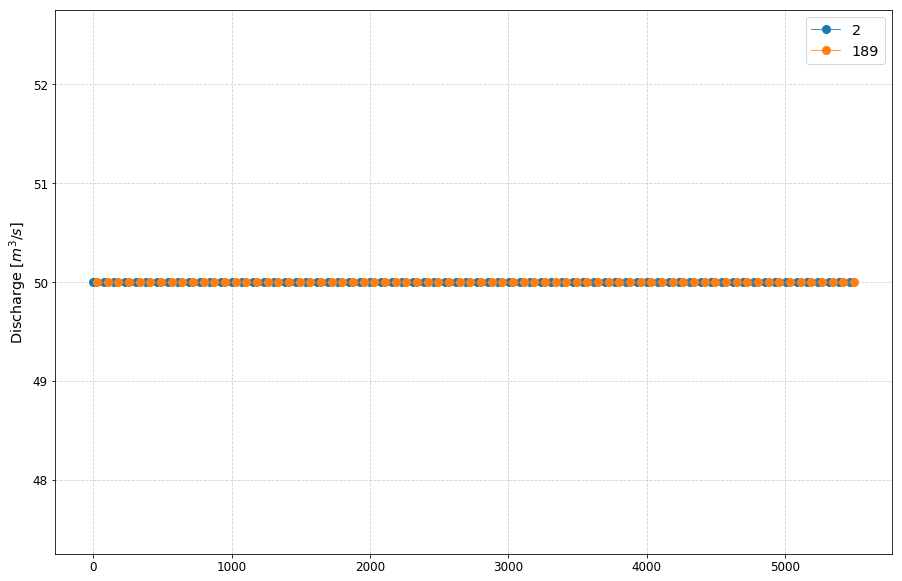

In [22]:
sectionID1 = 2
sectionID2 = 189

plt.plot(dfDischarge.loc[dfDischarge['sectionID'] == sectionID1]["discharge"], marker='.')
plt.plot(dfDischarge.loc[dfDischarge['sectionID'] == sectionID2]["discharge"], marker='.')
plt.grid()
#plt.xlabel("Distance [$m$]")
plt.ylabel("Discharge [$m^3/s$]")
plt.legend([sectionID1, sectionID2])

plt.show()